<a href="https://colab.research.google.com/github/nram1/trial1/blob/main/datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import scipy
from scipy.stats import ttest_ind
from statsmodels.multivariate.manova import MANOVA


In [262]:
df = pd.read_csv("track.csv")

In [263]:
df.head()

,year,state_code,county_code,msa,census_tract,applicant_age,applicant_age_above_62,race,ethnicity,sex,income,debt_to_income_ratio,tract_one_to_four_family_homes,tract_median_age_of_hu,tract_minority_pop_percent,tract_population,tract_to_msa_income_percentage,lei,aus,purchaser_type,ffiec_msa_md_median_fam_income,balloon_payment,business_or_commercial_purpose,combined_loan_to_value_ratio,conforming_loan_limit,construction_method,discount_points,interest_rate,lender_credits,loan_amount,loan_type,lien_status,occupancy_type,property_value,total_loan_costs,total_units,accepted,denial_reason
0,2019,TX,48201.0,26420.0,4.820142e+10,45-54,0.0,Native Hawaiian or Other Pacific Islander,Hispanic or Latino,Male,26.0,>60%,2331.0,39.0,84.39,6949.0,86.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,99.640,C,Site-built,NaN,NaN,NaN,95000.0,Conventional,Subordinate Lien,Principal residence,155000.0,NaN,1.0,0.0,Debt-to-income ratio
1,2019,TX,48201.0,26420.0,4.820143e+10,55-64,0.0,White,Not Hispanic or Latino,Joint,379.0,>60%,1202.0,35.0,24.86,3270.0,360.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,68.617,NC,Site-built,NaN,NaN,NaN,3225000.0,Conventional,First Lien,Principal residence,4705000.0,NaN,1.0,0.0,Debt-to-income ratio
2,2019,TX,48201.0,26420.0,4.820122e+10,45-54,0.0,Asian,Hispanic or Latino,Joint,86.0,41%-<46%,1261.0,45.0,89.71,4803.0,50.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,58.330,C,Site-built,NaN,6.010,NaN,105000.0,Conventional,First Lien,Principal residence,185000.0,NaN,1.0,1.0,NaN
3,2019,TX,48201.0,26420.0,4.820152e+10,55-64,1.0,White,Hispanic or Latino,Female,25.0,36%-<41%,651.0,41.0,75.32,3991.0,66.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,18.220,C,Site-built,NaN,6.125,NaN,65000.0,Conventional,First Lien,Principal residence,375000.0,NaN,1.0,1.0,NaN
4,2019,TX,48201.0,26420.0,4.820133e+10,65-74,1.0,White,Not Hispanic or Latino,Male,33.0,20%-<30%,871.0,44.0,94.26,6028.0,52.0,7H6GLXDRUGQFU57RNE97,NaN,NaN,77100.0,0.0,0.0,30.330,C,Site-built,NaN,4.500,NaN,75000.0,Conventional,First Lien,Principal residence,235000.0,NaN,1.0,1.0,NaN


In [264]:
df.isna().sum()

year                                   0
state_code                            41
county_code                            0
msa                                    0
census_tract                         641
applicant_age                          0
applicant_age_above_62                 0
race                                   0
ethnicity                              0
sex                                    0
income                              1033
debt_to_income_ratio                2789
tract_one_to_four_family_homes         0
tract_median_age_of_hu                 0
tract_minority_pop_percent             0
tract_population                       0
tract_to_msa_income_percentage         0
lei                                    0
aus                                17808
purchaser_type                     41343
ffiec_msa_md_median_fam_income         0
balloon_payment                        0
business_or_commercial_purpose         0
combined_loan_to_value_ratio        6630
conforming_loan_

In [265]:
df['race'].unique()

array(['Native Hawaiian or Other Pacific Islander', 'White', 'Asian',
       'Black or African American', 'American Indian or Alaska Native',
       'Joint', '2 or more minority races', 'Free Form Text Only'],
      dtype=object)

In [266]:
from sklearn.preprocessing import OrdinalEncoder

In [267]:
race_lst = ['Native Hawaiian or Other Pacific Islander', 'White', 'Asian',
       'Black or African American', 'American Indian or Alaska Native',
       'Joint', '2 or more minority races', 'Free Form Text Only']
race_enc = OrdinalEncoder(categories = [race_lst])

In [268]:
#data['race'] = data['race'].fit_transform(data['race'].values.reshape(-1,1))

In [269]:
minority_accepted = df.loc[(df.race == 'Black or African American') & (df.accepted == 1.0)]
white_accepted = df.loc[(df.race == 'White') & (df.accepted == 1.0)]
total_minority = df.loc[df.race == 'Black or African American']
total_white = df.loc[df.race == 'White']

In [270]:
total_minority.describe().accepted

count    18486.000000
mean         0.810451
std          0.391955
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: accepted, dtype: float64

In [271]:
df.describe().accepted

count    136261.000000
mean          0.875283
std           0.330398
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: accepted, dtype: float64

In [272]:
total_white.describe().accepted

count    98956.000000
mean         0.888799
std          0.314382
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: accepted, dtype: float64

In [273]:
#data.info()

In [274]:
def compare_2_groups(arr1, arr2, alpha):
  stat, p = ttest_ind(arr1, arr2)
  if p > alpha:
    print("Similar Distributions (fail to reject H0)", p)
  else:
    print("Different Distributions (reject H0)", p)

In [275]:
compare_2_groups(total_white.accepted, total_minority.accepted, 0.05)

Different Distributions (reject H0) 8.915574928321153e-195


In [276]:
#multivariate analysis using variables race and gender and seeing if mortgage acceptance differs among these two variables.

manova_analysis = MANOVA.from_formula('race + sex  ~ accepted', data = df)

In [277]:
print(manova_analysis.mv_test())

                                   Multivariate linear model
                                                                                                
------------------------------------------------------------------------------------------------
       Intercept               Value          Num DF    Den DF           F Value          Pr > F
------------------------------------------------------------------------------------------------
          Wilks' lambda              -0.0000 10.0000 136250.0000 -136358988717620304.0000 1.0000
         Pillai's trace               1.0000 10.0000 136250.0000 -136358988717620304.0000 1.0000
 Hotelling-Lawley trace -10007999171935.4355 10.0000 136250.0000 -136358988717620304.0000 1.0000
    Roy's greatest root -10007999171935.4355 10.0000 136250.0000 -136358988717620304.0000 1.0000
------------------------------------------------------------------------------------------------
                                                                  

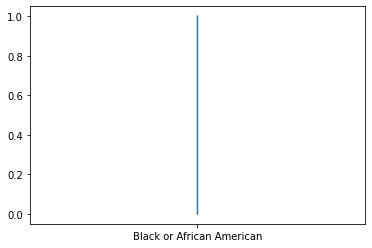

In [278]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()  # Create a figure containing a single axes.
#ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.
ax.plot(total_minority.race,total_minority.accepted)